In [0]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [0]:
## Carrega o arquivo com a série
## Dataset de passageiros ::: 
## https://www.kaggle.com/rakannimer/air-passengers
df_completos = pd.read_csv('passageiros.csv')

In [0]:
# Mostra as primeiras 10 linhas
df_completos.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [0]:
# Mostra os dados da série
df_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [0]:
# Cria uma nova coluna , Convertendo uma existente para datetime
df_completos['Month_datetime'] = pd.to_datetime(df_completos['Month'])

In [0]:
# Mostra as informações da coluna
df_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           144 non-null    object        
 1   #Passengers     144 non-null    int64         
 2   Month_datetime  144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [0]:
# Mostra as primeiras linhas
df_completos.head(10)

,Month,#Passengers,Month_datetime
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01
5,1949-06,135,1949-06-01
6,1949-07,148,1949-07-01
7,1949-08,148,1949-08-01
8,1949-09,136,1949-09-01
9,1949-10,119,1949-10-01


In [0]:
# Mostra os tipos de dados.
print(type(df_completos))
print(type(df_completos['Month_datetime']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


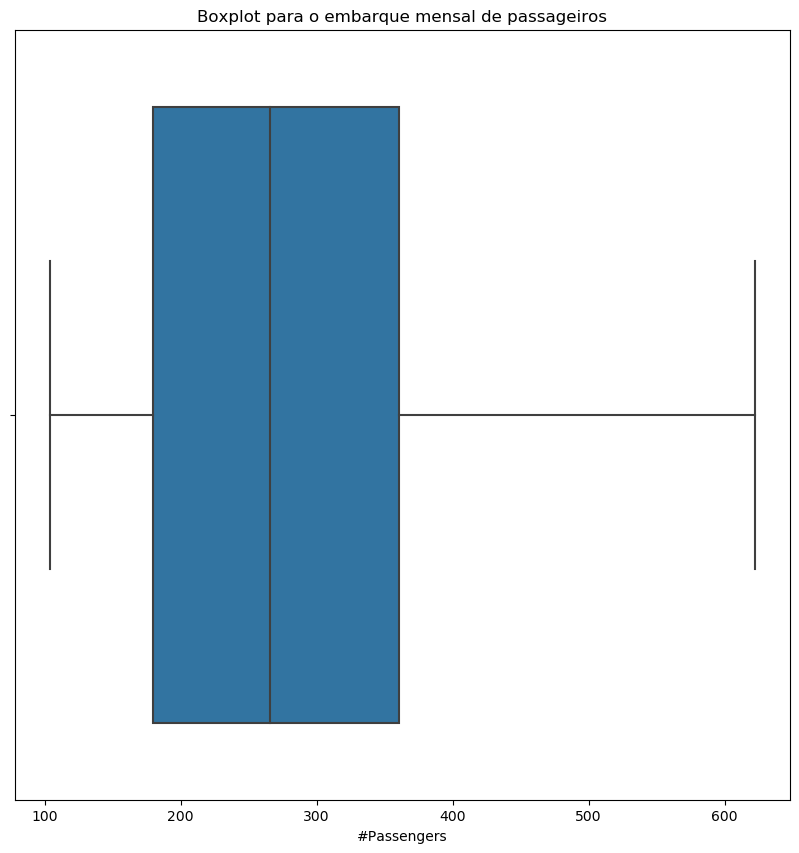

In [0]:
## Iniciando a impressão do Boxplot da coluna de numero de passageiros
plt.figure(figsize=(10, 10))
g = sns.boxplot(df_completos['#Passengers'])
g.set_title('Boxplot para o embarque mensal de passageiros')

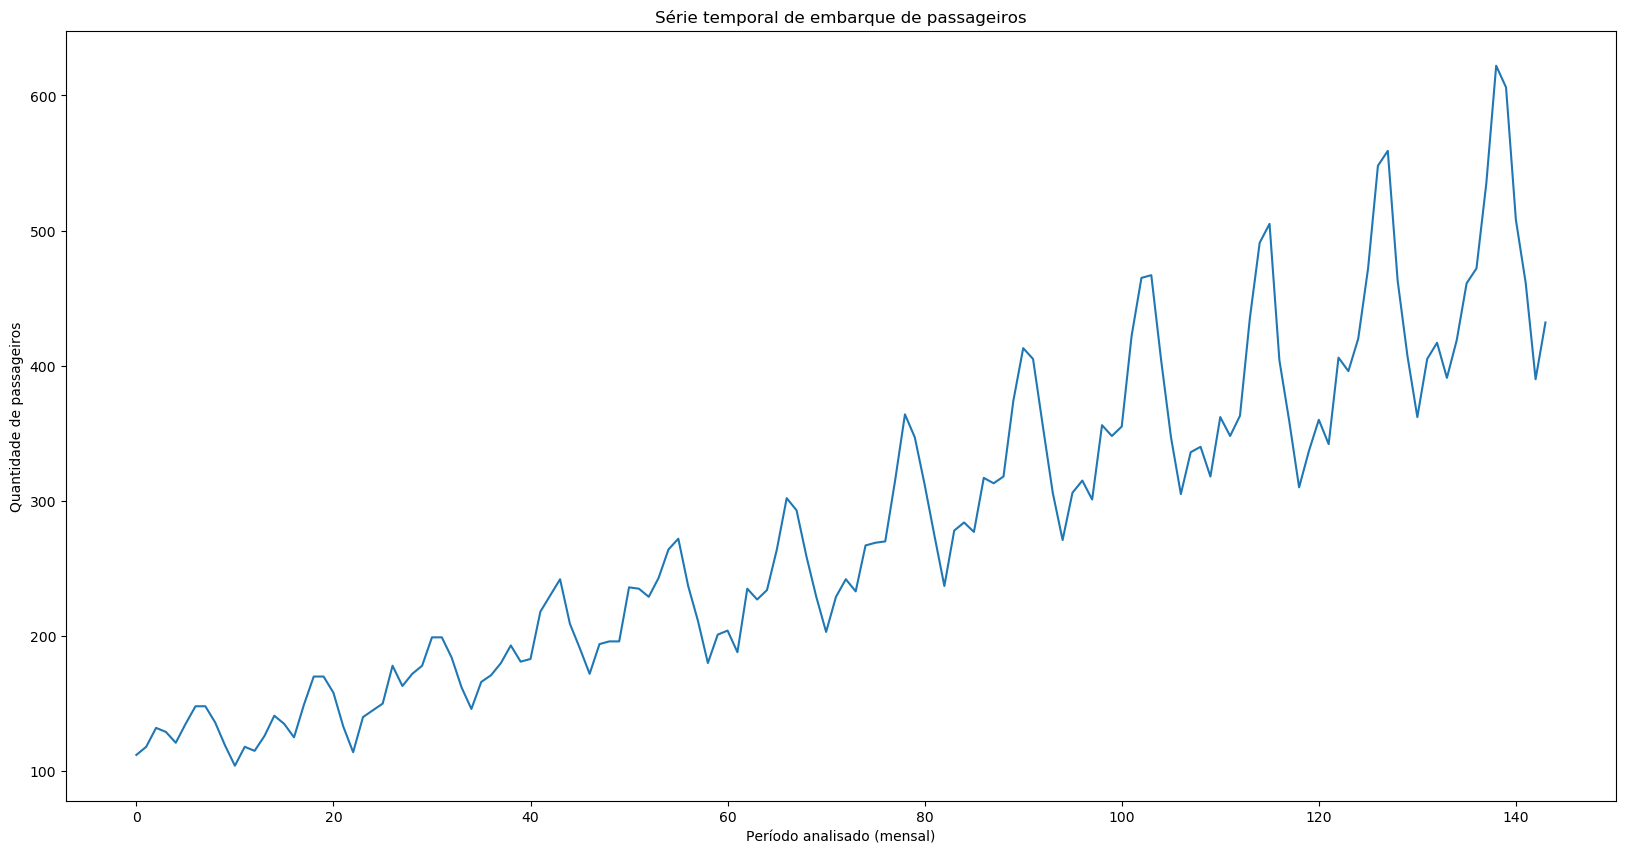

In [0]:
#Mostra a série usando o índice normal e o # de passageiros
plt.figure(figsize=(20, 10))
g = sns.lineplot( x=df_completos.index, y=df_completos['#Passengers'])
g.set_title('Série temporal de embarque de passageiros')
g.set_xlabel('Período analisado (mensal)')
g.set_ylabel('Quantidade de passageiros')

In [0]:
## instala lib se precisar
## ! pip install statsmodels

In [0]:
## Biblioteca de decomposição de séries temporais.
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
## Monta uma Série onde o índice é a data (do tipo datetime)
df_serie_temporal = df_completos.set_index('Month_datetime')
print(df_serie_temporal.columns)
df_serie_temporal.drop('Month', axis=1, inplace=True)
print(df_serie_temporal.columns)
print(df_serie_temporal.head(10))

Index(['Month', '#Passengers'], dtype='object')
Index(['#Passengers'], dtype='object')
                #Passengers
Month_datetime             
1949-01-01              112
1949-02-01              118
1949-03-01              132
1949-04-01              129
1949-05-01              121
1949-06-01              135
1949-07-01              148
1949-08-01              148
1949-09-01              136
1949-10-01              119


In [0]:
## decompondo os dadas da série temporal
decomposicao_aditiva = seasonal_decompose(df_serie_temporal, model='aditive', extrapolate_trend='freq' )

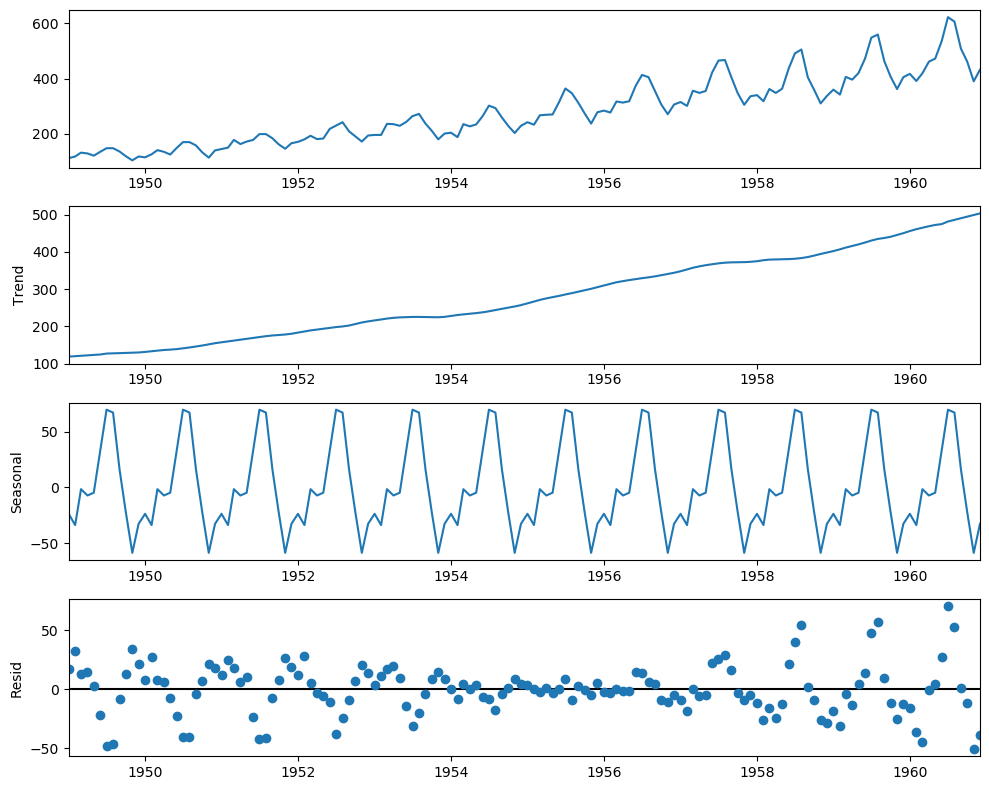

In [0]:
## imprime todos os parâmetros da série -> Série, tendência, Sasionalidade e Ru[ido]
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
fig=decomposicao_aditiva.plot()
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
resultado_adf = adfuller(df_serie_temporal['#Passengers'].values, autolag='AIC') ## Aplica o teste ADF, para encontrar hipóteses de raízes negativas

In [0]:
print('ADF P-Valor: ', resultado_adf[1]) ## Com o p-valor maior que 0.05 a hipótese nula não é rejeitada 
## > 0.05  -> Série temporal Não estacionária
## < 0.05  -> Série temporal estacionária

ADF P-Valor:  0.9918802434376409


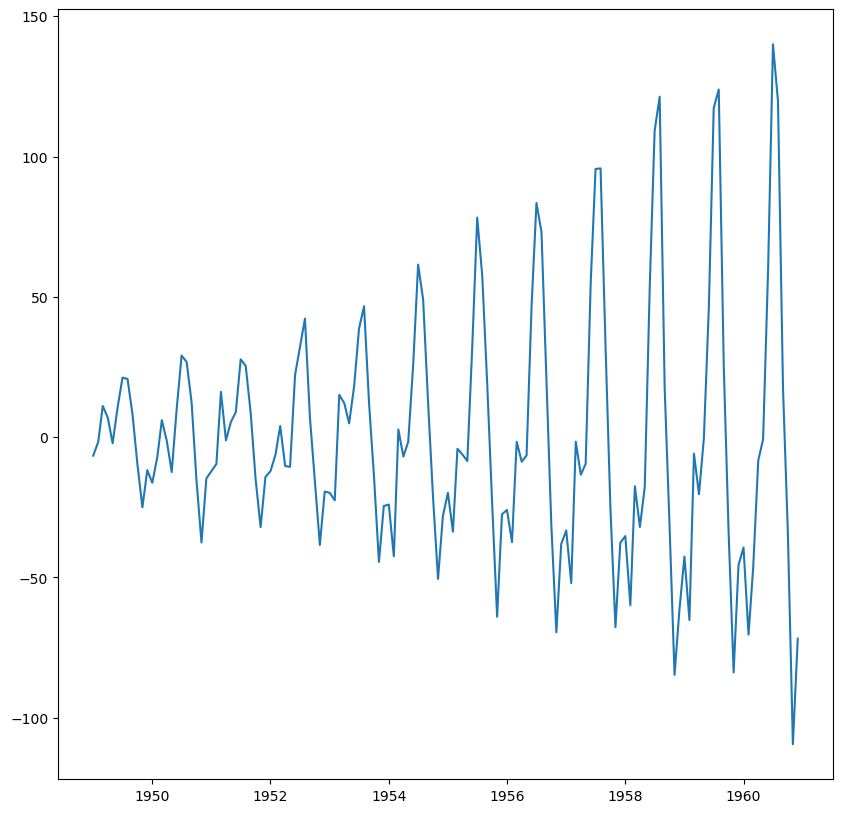

In [0]:
## imprimindo a série sem a tendência
plt.figure(figsize=(10, 10))
df_sem_tendencia = df_serie_temporal['#Passengers'].values - decomposicao_aditiva.trend
## df_sem_tendencia.head(100)
plt.plot(df_sem_tendencia)

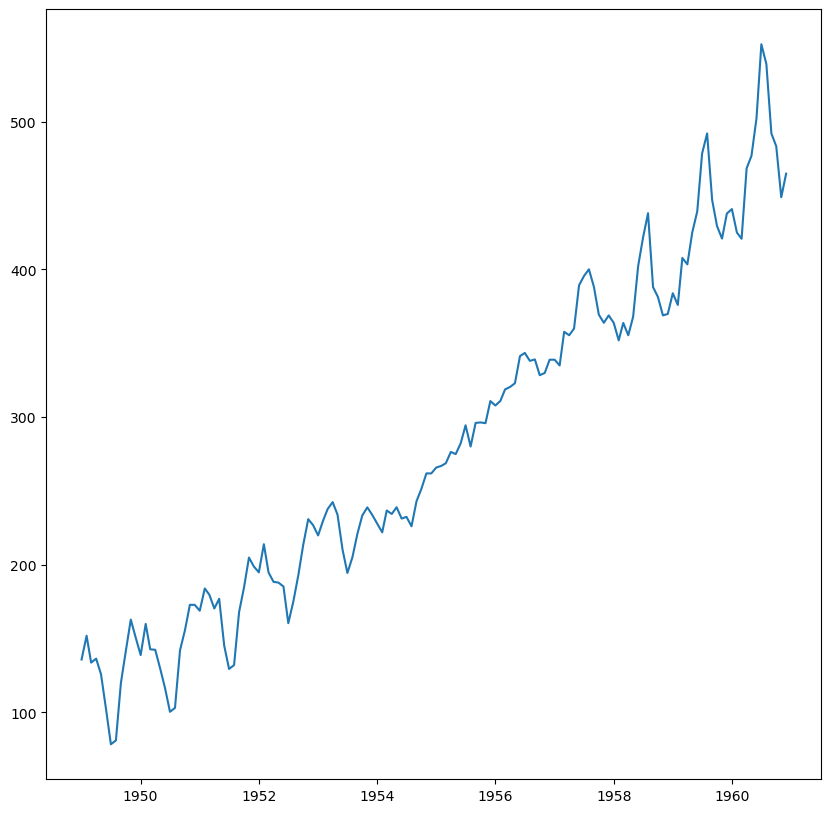

In [0]:
## imprimindo a série sem a tendência
plt.figure(figsize=(10, 10))
df_sem_tendencia = df_serie_temporal['#Passengers'].values - decomposicao_aditiva.seasonal
## df_sem_tendencia.head(100)
plt.plot(df_sem_tendencia)

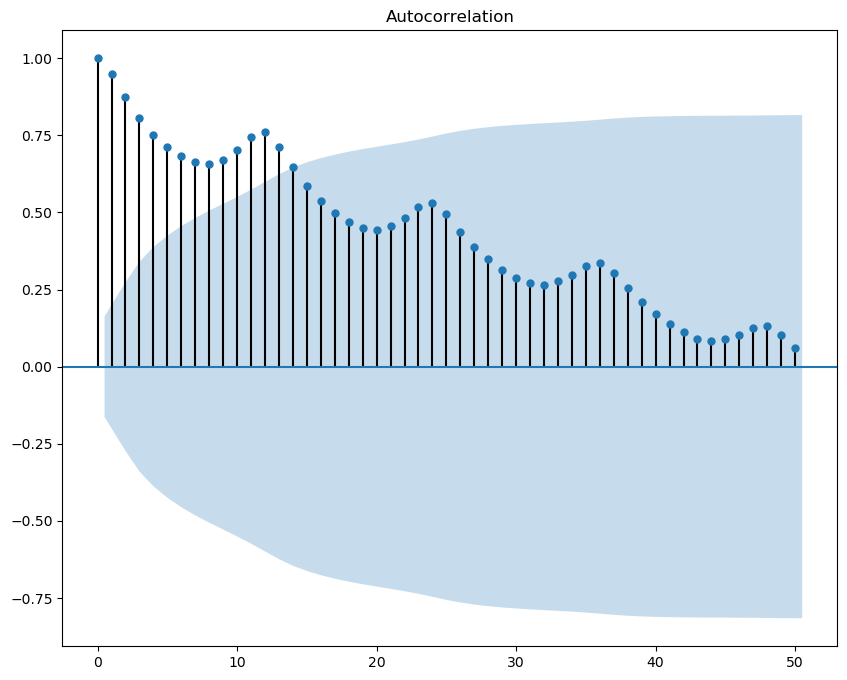

In [0]:
## Agora trabalhando com a Auto-Correlação
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_serie_temporal, lags=50)
plt.show()
## Leitura do gráfico, até 14 pontos para atrás, pode ter uma correção entre o atual e o passado.

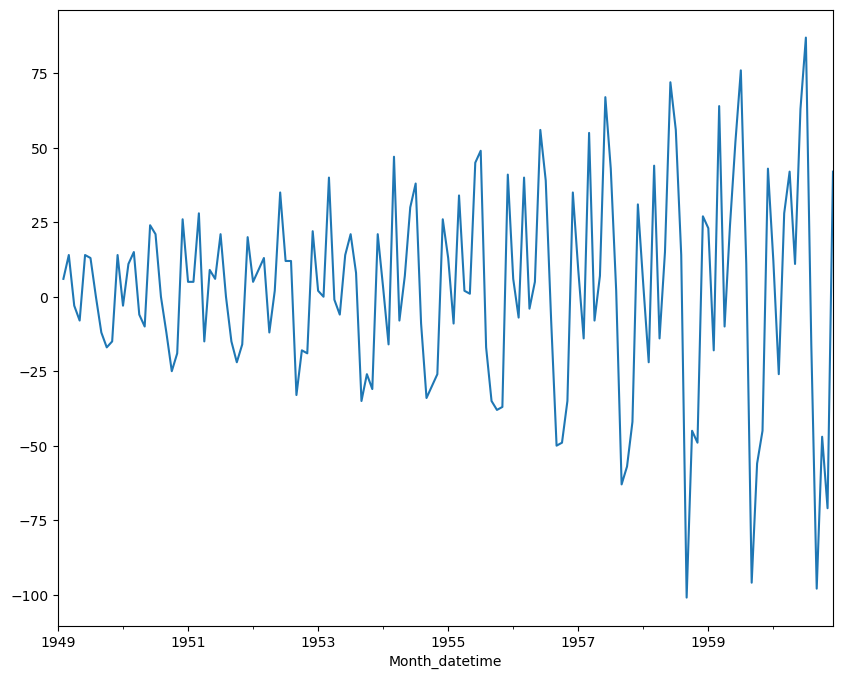

In [0]:
## Transformando a série não estacionária em estacionária
df_serie_temporal['#Passengers_diff'] = df_serie_temporal['#Passengers'] - df_serie_temporal['#Passengers'].shift(1)
df_serie_temporal['#Passengers_diff'] = df_serie_temporal['#Passengers_diff'].dropna()
df_serie_temporal['#Passengers_diff'].plot()

In [0]:
## Testando para ver se a série é estacionária ou não ...
X_diff = df_serie_temporal['#Passengers_diff'].dropna().values
resultado_adf_2 = adfuller(X_diff)
print('ADF P-Valor: ', resultado_adf_2[1]) ## Com o p-valor maior que 0.05 a hipótese nula não é rejeitada 
## > 0.05  -> Série temporal Não estacionária
## < 0.05  -> Série temporal estacionária

### ADF P-Valor:  0.054213290283825745 -> Quase estacionária

ADF P-Valor:  0.054213290283825745


In [0]:
############################## Usando Redes Neurais Tipo Recorrente #############################

In [0]:
## Importando as biliotecas do tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  mean_squared_error

In [0]:
## carrega os dados do arquivo (novamente)
## Colocar em um dataset
## Normaliza
df_completos = pd.read_csv('passageiros.csv')
serie_passageiros = df_completos['#Passengers'].values
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(serie_passageiros.reshape(-1,1))

In [0]:
print(dataset[0:10])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]]


In [0]:
## Vamos treinar a rede neural e para isso devemos separar os dados em treino em teste
## Como estamos usando uma série temporal, o corte dos dados necessita ser de um ponto.
## Assim será 67% para treino e o restante para teste
train_size = int ( len(dataset) * 0.67 )
test_size = len(dataset)  - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("Tamanho do treino e teste = ", len(train), len(test))

Tamanho do treino e teste =  96 48


In [0]:
## Função que vai transformar os dados de 1 coluna com 14 colunas, pegando o atual e os 14 anteriores.
def create_dataset( data, look_back = 1):
    dataX , dataY = [] , [] 
    for i in range( len(data) - look_back - 1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [0]:
## Teste de como ficou as matrizes com a análise de correlação
print(train[0:10,:])
print(create_dataset(train[0:10,:],1))
print(create_dataset(train[0:10,:],2))
print(create_dataset(train[0:10,:],2))

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]]
(array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208]]), array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606]))
(array([[0.01544402, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984556],
       [0.05984556, 0.08494208],
       [0.08494208, 0.08494208]]), array([0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606]))
(array([[0.01544402, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984556],
       [0.05984556, 0.08494208],
       [0.08494208, 0.08494208]]), array([0.05405405, 0.0

In [0]:
look_back = 14
train__X, train__Y = create_dataset(train, look_back)
test__X, test__Y = create_dataset(test, look_back)

train__X = np.reshape(train__X, (train__X.shape[0], 1, train__X.shape[1]))
test__X = np.reshape(test__X,  (test__X.shape[0], 1, test__X.shape[1]))

print(train__X.shape)

(81, 1, 14)


In [0]:
## Cria o modelo de rede neural
model = Sequential()
model.add( LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 304       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(train__X, train__Y, epochs=100, batch_size=1, verbose=2)

Train on 81 samples
Epoch 1/100
81/81 - 2s - loss: 0.0463
Epoch 2/100
81/81 - 0s - loss: 0.0109
Epoch 3/100
81/81 - 0s - loss: 0.0068
Epoch 4/100
81/81 - 0s - loss: 0.0060
Epoch 5/100
81/81 - 0s - loss: 0.0055
Epoch 6/100
81/81 - 0s - loss: 0.0048
Epoch 7/100
81/81 - 0s - loss: 0.0045
Epoch 8/100
81/81 - 0s - loss: 0.0042
Epoch 9/100
81/81 - 0s - loss: 0.0039
Epoch 10/100
81/81 - 0s - loss: 0.0037
Epoch 11/100
81/81 - 0s - loss: 0.0036
Epoch 12/100
81/81 - 0s - loss: 0.0035
Epoch 13/100
81/81 - 0s - loss: 0.0033
Epoch 14/100
81/81 - 0s - loss: 0.0032
Epoch 15/100
81/81 - 0s - loss: 0.0031
Epoch 16/100
81/81 - 0s - loss: 0.0029
Epoch 17/100
81/81 - 0s - loss: 0.0027
Epoch 18/100
81/81 - 0s - loss: 0.0026
Epoch 19/100
81/81 - 0s - loss: 0.0025
Epoch 20/100
81/81 - 0s - loss: 0.0025
Epoch 21/100
81/81 - 0s - loss: 0.0023
Epoch 22/100
81/81 - 0s - loss: 0.0022
Epoch 23/100
81/81 - 0s - loss: 0.0021
Epoch 24/100
81/81 - 0s - loss: 0.0020
Epoch 25/100
81/81 - 0s - loss: 0.0019
Epoch 26/100
8

In [0]:
train__Y_predict = model.predict(train__X)
test__Y_predict = model.predict(test__X)

In [0]:
train__Y_predict = scaler.inverse_transform(train__Y_predict)
train__Y = scaler.inverse_transform([train__Y])

test__Y_predict = scaler.inverse_transform(test__Y_predict)
test__Y = scaler.inverse_transform([test__Y])

In [0]:
## realiza a mudança dos dados para a previsão
trainPredictplot = np.empty_like(dataset)
trainPredictplot[:,:] = np.nan
trainPredictplot[look_back:len(train__Y_predict)+look_back, :] = train__Y_predict


testPredictplot = np.empty_like(dataset)
testPredictplot[:,:] = np.nan
testPredictplot[len(train__Y_predict)+(look_back*2)+1:len(dataset)-1, :] = test__Y_predict

(81, 1)
(1, 81)


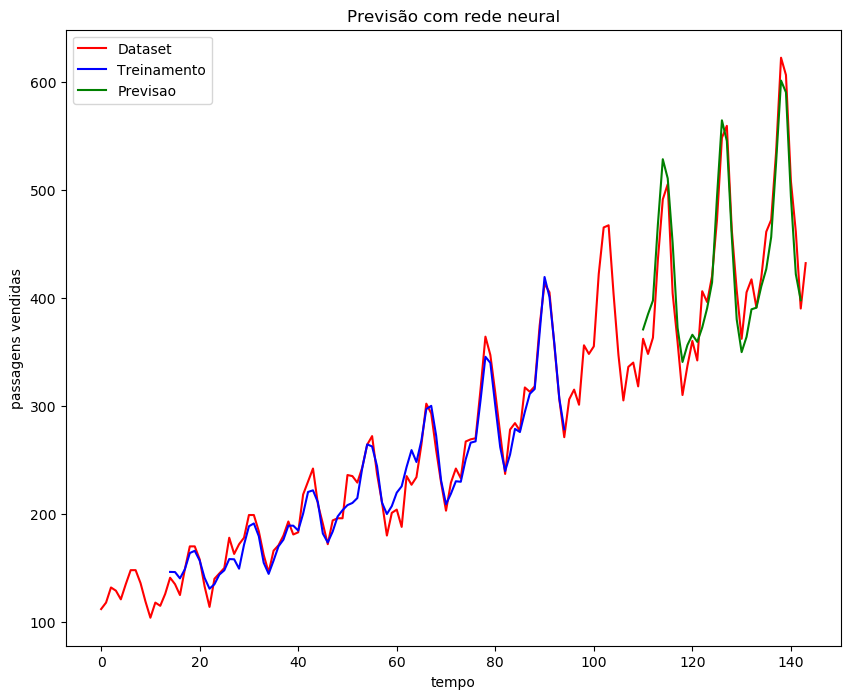

In [0]:
plt.plot(scaler.inverse_transform(dataset), label='Dataset', color='red')
plt.plot(trainPredictplot, label='Treinamento', color='blue')
plt.plot(testPredictplot, label='Previsao', color='green')
## plt.plot(trainPredictplot - train__Y.T, label='diferença', color='orange')
print(train__Y_predict.shape)
print(train__Y.shape)
plt.xlabel('tempo')
plt.ylabel("passagens vendidas")
plt.legend()
plt.title('Previsão com rede neural')